![example](images/director_shot.jpeg)

# Project Title

**Authors:** Nancy Ho
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

- As we enter the digital age, more and more companies are starting to venture into movie production. To remain on par with their competitors, it may be necessary for a tech giant like Microsoft to also consider movie production. Using data about successful movies from many sources, I describe attributes of successful movies in order to give corporate heads and investors an idea as to what kind of movies Microsoft should produce to ensure success.
- I believe there are two main factors that contribute to a movie's success: the profit it makes and its ratings from critics and moviewatchers.
- Comparing based on genres so you can have a good idea of what movies to produce

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
# Here you run your code to explore the data
conn = sqlite3.connect('data\movies.db')
cur = conn.cursor()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

To create the datasets I used in my analysis, I used SQL queries to join tables from `movies.db` database to ensure that my datasets would only contain the columns that would be the most relevant to my investigation.

For my first dataframe `gross_df`, I joined the `bom_movie_gross` and `imdb_title_basics` tables

In [28]:
cur.execute("""SELECT b.title AS movie, b.domestic_gross, b.foreign_gross, m.genres 
               FROM bom_movie_gross b
               JOIN imdb_title_basics m
               ON b.title = m.primary_title
               GROUP BY movie;""")
gross_df = pd.DataFrame(cur.fetchall())
gross_df.columns = [x[0] for x in cur.description]
gross_df

,movie,domestic_gross,foreign_gross,genres
0,'71,1300000.0,355000,"Action,Drama,Thriller"
1,"1,000 Times Good Night",53900.0,None,"Drama,War"
2,10 Cloverfield Lane,72100000.0,38100000,"Drama,Horror,Mystery"
3,10 Years,203000.0,None,"Comedy,Drama,Romance"
4,1001 Grams,11000.0,None,Drama
...,...,...,...,...
2600,Zindagi Na Milegi Dobara,3100000.0,None,"Comedy,Drama"
2601,Zombeavers,14900.0,None,"Action,Adventure,Comedy"
2602,Zookeeper,80400000.0,89500000,"Comedy,Family,Romance"
2603,Zoolander 2,28800000.0,27900000,Comedy


During the exploratory data analysis stage, I discovered that the `foreign_gross` column consisted of strings instead of numbers like it seems, so I changed the whole column to `float` type before proceeding.

In [29]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',','').astype(float)

Then I create the `total_gross` column to determine the total gross profit movies had made. This information will become relevant when I plot out the gross information later.

In [30]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(0)
gross_df = gross_df.dropna(subset = ['domestic_gross'])
gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']

<ipython-input-30-c046b6782d06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']


I also wanted to investigate the relationship between gross profit and individual genres, but discovered that all the entries in the `genres` column were all single strings. I made a new column, `split_genres`, to create a list containing the individual genres of each movie entry as indicated by commas in the strings of the `genre` column.

In [34]:
gross_df['split_genres'] = gross_df['genres'].str.split(',')
gross_df = gross_df.dropna(subset = ['genres'])
gross_df

<ipython-input-34-35a209bbf52a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_df['split_genres'] = gross_df['genres'].str.split(',')


,movie,domestic_gross,foreign_gross,genres,total_gross,split_genres
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1.655000e+06,"[Action, Drama, Thriller]"
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",5.390000e+04,"[Drama, War]"
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",1.102000e+08,"[Drama, Horror, Mystery]"
3,10 Years,203000.0,0.0,"Comedy,Drama,Romance",2.030000e+05,"[Comedy, Drama, Romance]"
4,1001 Grams,11000.0,0.0,Drama,1.100000e+04,[Drama]
...,...,...,...,...,...,...
2600,Zindagi Na Milegi Dobara,3100000.0,0.0,"Comedy,Drama",3.100000e+06,"[Comedy, Drama]"
2601,Zombeavers,14900.0,0.0,"Action,Adventure,Comedy",1.490000e+04,"[Action, Adventure, Comedy]"
2602,Zookeeper,80400000.0,89500000.0,"Comedy,Family,Romance",1.699000e+08,"[Comedy, Family, Romance]"
2603,Zoolander 2,28800000.0,27900000.0,Comedy,5.670000e+07,[Comedy]


To be able to plot out my data by individual genres, I used the `.explode()` command to split the genres into individual columns. I assigned the dataframe with split rows to a new dataframe, `split_gross_df`, in case I needed to do additional analysis on the original `gross_df` later. 

In [35]:
split_gross_df = gross_df.explode('split_genres')
split_gross_df

,movie,domestic_gross,foreign_gross,genres,total_gross,split_genres
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1.655000e+06,Action
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1.655000e+06,Drama
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1.655000e+06,Thriller
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",5.390000e+04,Drama
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",5.390000e+04,War
...,...,...,...,...,...,...
2602,Zookeeper,80400000.0,89500000.0,"Comedy,Family,Romance",1.699000e+08,Romance
2603,Zoolander 2,28800000.0,27900000.0,Comedy,5.670000e+07,Comedy
2604,Zootopia,341300000.0,682500000.0,"Adventure,Animation,Comedy",1.023800e+09,Adventure
2604,Zootopia,341300000.0,682500000.0,"Adventure,Animation,Comedy",1.023800e+09,Animation


Using the same process as `gross_df`, I then created `ratings_df` for investigating the average ratings of movies based on genre.

In [31]:
cur.execute("""SELECT m.primary_title, r.averagerating, r.numvotes, m.genres
               FROM imdb_title_basics m
               JOIN imdb_title_ratings r
               USING(tconst);""")
ratings_df = pd.DataFrame(cur.fetchall())
ratings_df.columns = [x[0] for x in cur.description]
ratings_df

,primary_title,averagerating,numvotes,genres
0,Sunghursh,7.0,77,"Action,Crime,Drama"
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama"
2,The Other Side of the Wind,6.9,4517,Drama
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama"
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy"
...,...,...,...,...
73851,Diabolik sono io,6.2,6,Documentary
73852,Sokagin Çocuklari,8.7,136,"Drama,Family"
73853,Albatross,8.5,8,Documentary
73854,La vida sense la Sara Amat,6.6,5,None


Once again, I follow the same steps to separate the genres for each movie and assign the dataframe with split genres for all the movies to `split_ratings_df`.

In [37]:
ratings_df['split_genres'] = ratings_df['genres'].str.split(',')
ratings_df

<ipython-input-37-ac3461e6cc35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df['split_genres'] = ratings_df['genres'].str.split(',')


,primary_title,averagerating,numvotes,genres,split_genres
0,Sunghursh,7.0,77,"Action,Crime,Drama","[Action, Crime, Drama]"
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama","[Biography, Drama]"
2,The Other Side of the Wind,6.9,4517,Drama,[Drama]
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama","[Comedy, Drama]"
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"
...,...,...,...,...,...
73850,Swarm Season,6.2,5,Documentary,[Documentary]
73851,Diabolik sono io,6.2,6,Documentary,[Documentary]
73852,Sokagin Çocuklari,8.7,136,"Drama,Family","[Drama, Family]"
73853,Albatross,8.5,8,Documentary,[Documentary]


In [38]:
ratings_df = ratings_df.dropna(subset = ['genres'])
split_ratings_df = ratings_df.explode('split_genres')
split_ratings_df

,primary_title,averagerating,numvotes,genres,split_genres
0,Sunghursh,7.0,77,"Action,Crime,Drama",Action
0,Sunghursh,7.0,77,"Action,Crime,Drama",Crime
0,Sunghursh,7.0,77,"Action,Crime,Drama",Drama
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama",Biography
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama",Drama
...,...,...,...,...,...
73851,Diabolik sono io,6.2,6,Documentary,Documentary
73852,Sokagin Çocuklari,8.7,136,"Drama,Family",Drama
73852,Sokagin Çocuklari,8.7,136,"Drama,Family",Family
73853,Albatross,8.5,8,Documentary,Documentary


After dealing with splitting the genres in `ratings_df`, I got curious about popular and well-received genre combinations. Seeing as there were a good number of them before, I wanted to filter out genre combinations based on how many movies had those combinations, and chose a threshold of 500 movies. I go ahead and store this information into the `combined_ratings_df` to distinguish it from the other rating dataframes.

In [44]:
x_df = ratings_df.groupby('genres').count().iloc[:,0]
x2_df = x_df[x_df >= 500].index
combined_ratings_df = ratings_df[ratings_df.genres.isin(x2_df)]
combined_ratings_df.groupby('genres').mean().head()

,averagerating,numvotes
genres,,
Action,5.757712,336.115424
"Action,Crime,Drama",5.989146,9899.560498
"Biography,Documentary",7.221758,289.139769
Comedy,5.777998,1217.181008
"Comedy,Drama",6.364119,2469.560183


To look for a possible relationship between a movie's profits and ratings, I merged the original dataframes `gross_df` and `ratings_df` to reduce the amount of duplicate entries for all the movies in both dataframes.

In [41]:
gross_and_ratings_df = gross_df.merge(ratings_df, left_on='movie', right_on='primary_title', suffixes=('', '_y'))
gross_and_ratings_df

,movie,domestic_gross,foreign_gross,genres,total_gross,split_genres,primary_title,averagerating,numvotes,genres_y,split_genres_y
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1.655000e+06,"[Action, Drama, Thriller]",'71,7.2,46103,"Action,Drama,Thriller","[Action, Drama, Thriller]"
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",5.390000e+04,"[Drama, War]","1,000 Times Good Night",7.1,6848,"Drama,War","[Drama, War]"
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",1.102000e+08,"[Drama, Horror, Mystery]",10 Cloverfield Lane,7.2,260383,"Drama,Horror,Mystery","[Drama, Horror, Mystery]"
3,10 Years,203000.0,0.0,"Comedy,Drama,Romance",2.030000e+05,"[Comedy, Drama, Romance]",10 Years,6.1,22484,"Comedy,Drama,Romance","[Comedy, Drama, Romance]"
4,1001 Grams,11000.0,0.0,Drama,1.100000e+04,[Drama],1001 Grams,6.3,1301,Drama,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...
2919,Zindagi Na Milegi Dobara,3100000.0,0.0,"Comedy,Drama",3.100000e+06,"[Comedy, Drama]",Zindagi Na Milegi Dobara,8.1,58912,"Comedy,Drama","[Comedy, Drama]"
2920,Zombeavers,14900.0,0.0,"Action,Adventure,Comedy",1.490000e+04,"[Action, Adventure, Comedy]",Zombeavers,4.8,14825,"Action,Adventure,Comedy","[Action, Adventure, Comedy]"
2921,Zookeeper,80400000.0,89500000.0,"Comedy,Family,Romance",1.699000e+08,"[Comedy, Family, Romance]",Zookeeper,5.2,52396,"Comedy,Family,Romance","[Comedy, Family, Romance]"
2922,Zoolander 2,28800000.0,27900000.0,Comedy,5.670000e+07,[Comedy],Zoolander 2,4.7,59914,Comedy,[Comedy]


To further investigate ratings, particularly between audiences and critics, I created `rotten_tomatoes_df` as well. Like the previous dataframes, I split the genres here as well and create the `split_tomatoes_df` dataframe.

In [45]:
cur.execute("""SELECT movie_title, genres, tomatometer_status, tomatometer_rating, tomatometer_count, audience_status, audience_rating, audience_count
               FROM rotten_tomatoes_movies
               ORDER BY audience_count DESC
               LIMIT 1000;""")
rotten_tomatoes_df = pd.DataFrame(cur.fetchall())
rotten_tomatoes_df.columns = [x[0] for x in cur.description]
rotten_tomatoes_df.head(5)

,movie_title,genres,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count
0,Titanic,"Drama, Romance",Certified-Fresh,89.0,192.0,Upright,69.0,35797635.0
1,The Lord of the Rings: The Return of the King,"Action & Adventure, Classics, Science Fiction ...",Certified-Fresh,93.0,275.0,Upright,86.0,34679773.0
2,Spider-Man,"Action & Adventure, Mystery & Suspense, Scienc...",Certified-Fresh,90.0,245.0,Upright,67.0,34297354.0
3,Shrek 2,"Animation, Comedy, Kids & Family, Science Fict...",Certified-Fresh,89.0,236.0,Upright,69.0,34232524.0
4,Harry Potter and the Goblet of Fire,"Action & Adventure, Kids & Family, Science Fic...",Certified-Fresh,88.0,255.0,Upright,74.0,34153607.0


In [46]:
rotten_tomatoes_df['split_genres'] = rotten_tomatoes_df['genres'].str.split(',')
rotten_tomatoes_df = rotten_tomatoes_df.explode('split_genres')
rotten_tomatoes_df['split_genres'] = rotten_tomatoes_df['split_genres'].str.lstrip(" ")

In [49]:
split_tomatoes_df = rotten_tomatoes_df.groupby('split_genres').mean()
split_tomatoes_df

,tomatometer_rating,tomatometer_count,audience_rating,audience_count
split_genres,,,,
Action & Adventure,59.341463,159.509756,66.839024,1.944110e+06
Animation,76.010870,135.000000,73.086957,1.653685e+06
Art House & International,85.333333,182.000000,81.000000,4.090327e+05
Classics,80.750000,113.071429,81.642857,4.141992e+06
Comedy,54.342466,130.698630,64.849315,2.446065e+06
Cult Movies,68.166667,111.500000,71.166667,5.697205e+05
Documentary,64.000000,144.666667,68.666667,4.763997e+05
Drama,61.397531,155.461728,72.417284,1.862296e+06
Horror,47.305344,121.549618,57.106870,1.194114e+06


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [17]:
# Here you run your code to model the data
alphabetical_genres = gross_df.split_genres.unique()
alphabetical_genres.sort()

Total gross for movies based on genre (domestic gross is denoted)
- Action, Adventure, Animated and Sci-Fi movies do the best in terms of domestic and international profit

Text(0.5, 1.0, 'Average Gross Profit Based On Genre')

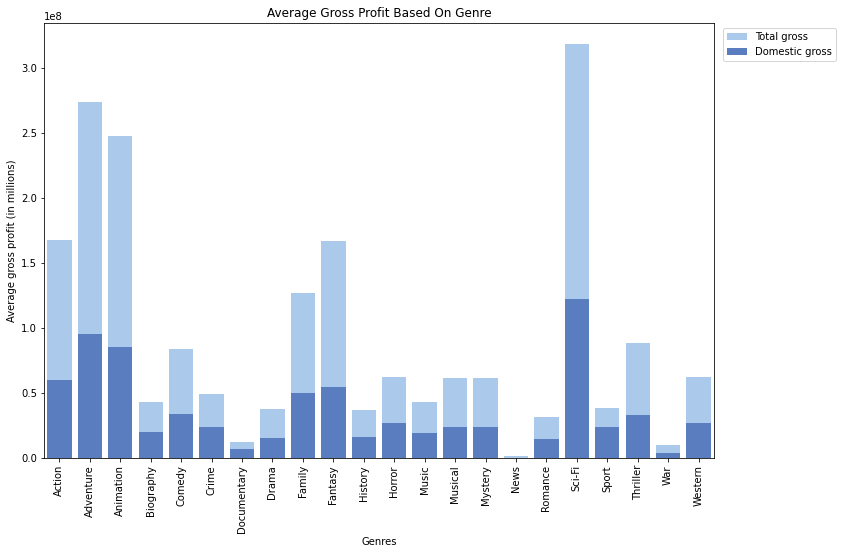

In [39]:
f, ax = plt.subplots(figsize=(12,8))
sns.set_color_codes('pastel')
sns.barplot(x='split_genres', y='total_gross', data=split_gross_df, label='Total gross', color='b', ci=None, order=alphabetical_genres)

sns.set_color_codes('muted')
sns.barplot(x='split_genres', y='domestic_gross', data=split_gross_df, label='Domestic gross', color='b', ci=None, order=alphabetical_genres)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.19, 1), loc="upper right", frameon=True)
ax.set_xlabel('Genres')
ax.set_ylabel('Average gross profit (in millions)')
ax.set_title('Average Gross Profit Based On Genre')

IMDB average ratings by individual genres
- Non-fictional movies tend to do the best

Text(0.5, 1.0, 'IMDB Average Movie Ratings (Individual Genres)')

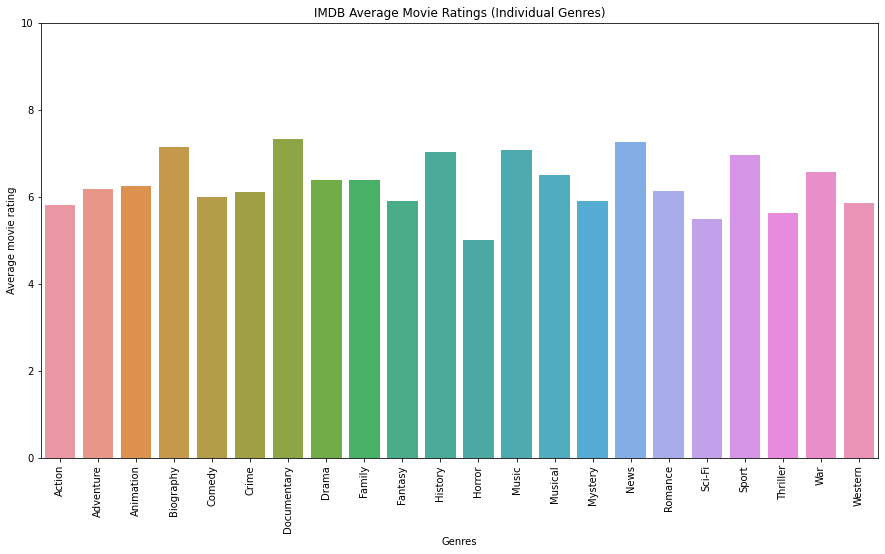

In [40]:
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='split_genres', y='averagerating', data=split_ratings_df, ci=None, order=alphabetical_genres)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,10)
ax.set_xlabel('Genres')
ax.set_ylabel('Average movie rating')
ax.set_title('IMDB Average Movie Ratings (Individual Genres)')

IMDB average ratings for common combinations of genres (more than 500 movies)
- again, we see that non-fictional genre combinations tend to rate better than others

Text(0.5, 1.0, 'IMDB Average Movie Ratings (Combined Genres)')

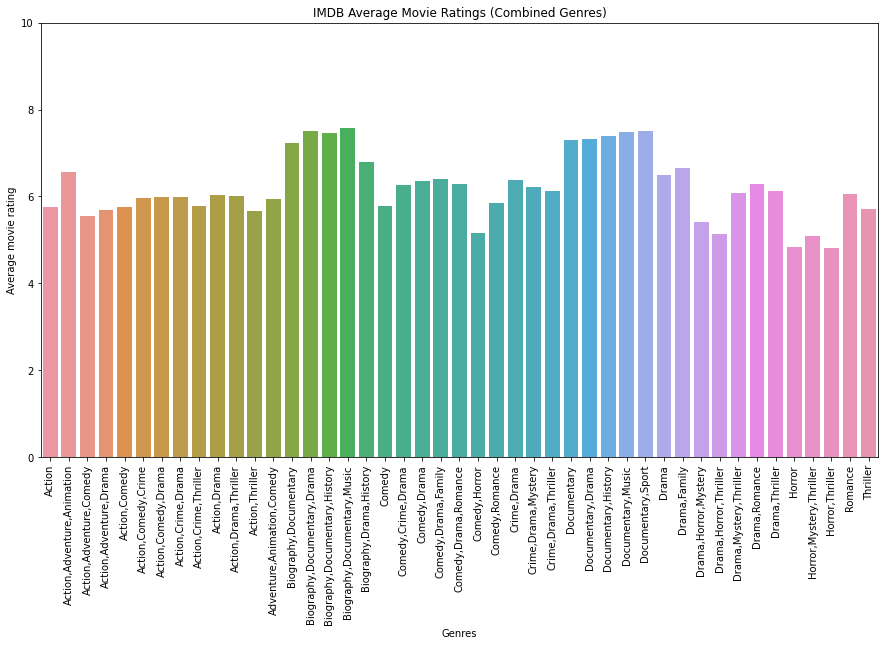

In [20]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='genres', y='averagerating', data=combined_ratings_df,
                order=x2_df, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,10)
ax.set_xlabel('Genres')
ax.set_ylabel('Average movie rating')
ax.set_title('IMDB Average Movie Ratings (Combined Genres)')

Comparing audience vs critics (tomatometer) ratings by genre
- 

Text(0, 0.5, 'Rating')

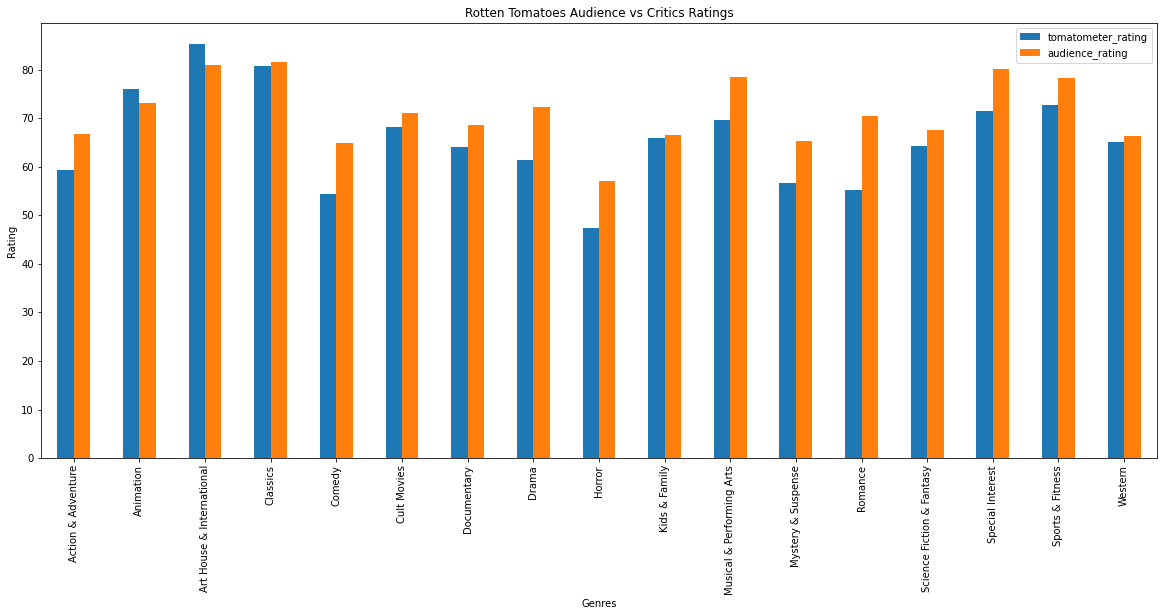

In [50]:
fig, ax = plt.subplots(figsize=(20,8))
split_tomatoes_df[['tomatometer_rating', 'audience_rating']].plot(kind='bar', ax=ax)
ax.set_title('Rotten Tomatoes Audience vs Critics Ratings')
ax.set_xlabel('Genres')
ax.set_ylabel('Rating')

Seeing if there's a correlation between gross profit and average rating (just because a movie is successful doesn't mean it's a good movie)
- A lot of the movies that made significant profits don't have high ratings
- There is a correlation between gross profit and rating, but it's very weak. Just because a movie makes profit doesn't mean it's good, and just because a movie is considered good doesn't mean it could be called "successful".

Text(0, 0.5, 'Average rating')

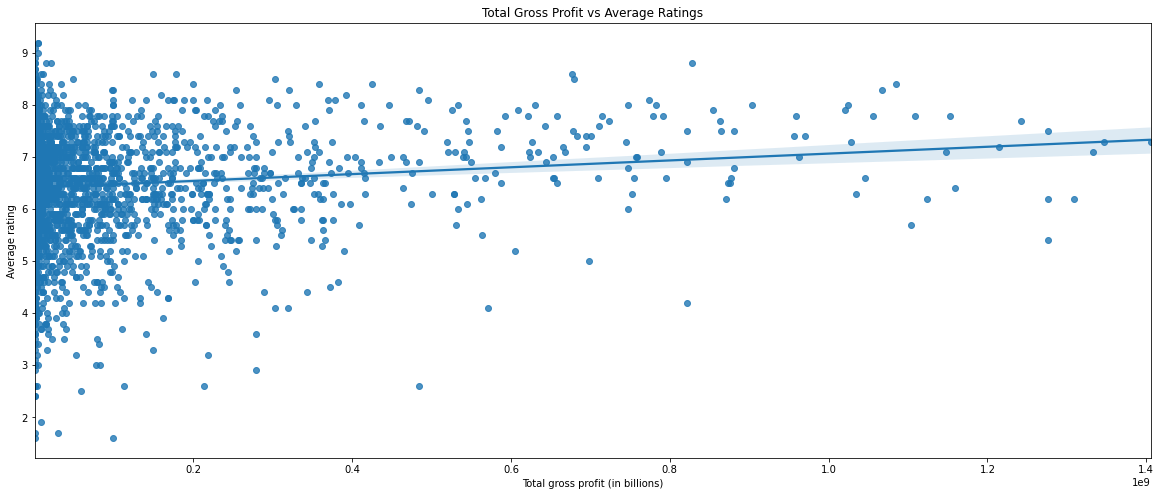

In [42]:
f, ax = plt.subplots(figsize=(20,8))
sns.regplot(x="total_gross", y="averagerating", data=gross_and_ratings_df, ax=ax)
ax.set_title('Total Gross Profit vs Average Ratings')
ax.set_xlabel('Total gross profit (in billions)')
ax.set_ylabel('Average rating')

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

- You may want to start by offering positions to up and coming directors and scriptwriters, preferrably those who had experience working on successful movies before, and gain leverage in the movie production process.
- Something to take into consideration is that for some movies, a large part of their success can be attributed to expectations tied to many of its factors, such as it being part of a series, or having certain A-list actors. If you want to make a footprint in the movie industry, be sure you keep those limitations in mind as you try to work your way up.
- Quality over quantity